# 案例说明
你是一家银行的数据分析师助理。银行最近注意到信用卡的客户流失率上升，管理层对此非常关注。请你通过本案例的操作，分析客户数据并找出可能影响客户流失的因素。

这个案例的目的不仅是让你了解和掌握一些基本的数据处理和分析技巧，而且也是让你理解大数据技术在银行业务中的应用，即如何使用这些技术进行客户流失分析。通过完成这个案例，你可以了解到大数据技术如何帮助银行理解客户的行为，并据此采取措施防止客户流失。

虽然这个案例中没有涉及到复杂的机器学习技术，但通过完成这个案例，你还是可以了解到数据分析的基本流程，包括数据清洗、数据探索、数据分析等。这些基础的数据处理和分析技术是大数据领域的核心技能，对于学习更高级的数据分析和机器学习技术有很好的基础。

最后，希望你能够通过这个案例，对大数据技术在银行业务中的应用有更深的理解，同时也能提升自己的数据处理和分析能力。

**数据集说明**

你将获得两个数据集：
1. </br>
客户个人信息.xlsx：包含客户的基本信息，如ID、年龄、性别、家庭成员、受教育程度、婚姻状态和收入等

2. </br>
用户银行卡信息.csv：包含客户的信用卡使用情况，如ID、是否流失、信用卡类别、开卡的总月份、不活跃月份个数、银行服务次数、信用额度、循环信贷、平均每月剩余额度、信用卡总开销、信用卡使用次数和平均利用率等。

**数据集修订说明**

1. 第一个数据集2万多条，第二个数据集3万多条，交集合并后的数据集1万多条；
2. 第一个数据集的收入，改为浮点型，并按照原数据集的范围内随机产生数据；（为了将来做特征工程-收入类别使用）
3. 第一个数据集增加一个“填写日期”的字段，字符串型，如2022-02-17.可以从2021年6月，到2022年12月，随机产生。
4. 第一个数据集增加重复ID的数据（随机生成4600条重复数据），重复数据的“填写日期”字段按上述规则随机产生，收入在原来基础上随机浮动20%，其他字段都相同。
5. 第二个数据集，增加空值；
6. 第二个数据集，增加重复ID的数据（随机产生2600条全部重复的数据）。
7. 第二个数据集，增加开卡日期？（训练类型转换） 这个变量与开卡总月份的关系？
8. 设计为两个不同的数据集，训练数据集和比赛数据集，包括字段的名称，如ID也不一样，字段大小也不一样（训练集可以在这个基础上，缩减几个字段）。

**比赛任务**

在3小时的比赛时间内，完成以下任务并计算相应得分，注意：
1. 按照程序中的注释，填写完成任务；
2. 可以选择帮助，但第二级和第三级帮助将降低本任务的总得分。


## 第一部分 数据导入和观测  （预计38分钟，75分）

**1. 环境搭建**  （ 预计3分钟，共10分 ）

补全两行代码 预计需要 5 分钟

1. 考核： 5分  请导入pandas库
    帮助1:  5分  导入pandas的库,帮助1基本与注释帮助相同。
    帮助2:  4分  import _______ as pd 
    帮助3:  2.5分  import pandas as pd
2. 考核： 5分  请导入 matplotlib 库 

In [34]:
# import packages 导入库，搭建环境
import numpy as np  # 训练题 2分
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings 可以删除
import warnings
warnings.filterwarnings("ignore")
# 为了让matplotlib里显示中文字符
import matplotlib.font_manager as fm 
matplotlib.rcParams['font.family'] = 'Microsoft Yahei' # 设置字体


**2.导入数据集** （预计25分钟 ，共40分）

考核点：   共40分
任务说明： 使用Pandas读取'客户个人信息.xlsx'和'用户银行卡信息.csv'两个数据集，并将它们存储为data_customer和data_credit_card，观测数据并回答问题。

修订说明： 
第一个数据集2万多条，第二个数据集3万多条，合并后的额数据集1万多条； 第一个数据集的收入，改为浮点型，并按照他的提示随机产生数据； 第二个数据集，增加空值；
设计为两个不同的数据集，训练数据集和比赛数据集，包括字段的名称，如ID也不一样，字段大小也不一样（训练集可以在这个基础上，缩减几个字段）。

In [35]:
# 导入第一个数据集 共24分
data_customer = pd.read_excel('用户个人信息.xlsx')  # 训练比赛题 10分 读取“客户个人信息.xlsx“到data_customer,并设计帮助1、2、3
data_customer.head() 

,ID,年龄,性别,家庭成员,受教育程度,婚姻状态,收入
0,768805383,45.0,男,3,高中,已婚,6-8万
1,818770008,49.0,女,5,研究生,单身,小于4万
2,713982108,51.0,男,3,研究生,已婚,8-12万
3,769911858,40.0,女,4,高中,NaN,小于4万
4,709106358,40.0,男,3,未受教育,已婚,6-8万


请输入一行代码，打印本数据集的行数

In [36]:
print(data_customer.shape[0]) # 训练比赛题 2分  请填写打印内容（检查数据集有多少行数据）

10237


In [37]:
data_customer.dtypes # 训练比赛题 2分 检查每列的数据类型，并回答问题

ID         int64
年龄       float64
性别        object
家庭成员       int64
受教育程度     object
婚姻状态      object
收入        object
dtype: object

回答问题： 2分

根据对以上数据集的类型观察，我们发现“年龄”字段，可以修订为 ______ 数据类型。

根据对以上数据集的类型观察，我们还可以 ____ 字段，修订为“类别”的数据类型。


In [38]:
data_customer.isnull().sum()  # 训练比赛题 2分  检查缺失值

ID          0
年龄        124
性别          0
家庭成员        0
受教育程度    1535
婚姻状态      754
收入       1120
dtype: int64

回答问题： 2分 

根据缺失值检查的结果，_____ 字段的缺失值最多。
再此处给出缺失值字段的补全推荐策略，可以采用：中位数补全、

In [39]:
data_customer['年龄'].describe() # 训练比赛题 2分 对数据集中的“年龄”参数进行初步的统计分析

count    10113.000000
mean        46.352418
std          8.073020
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: 年龄, dtype: float64

回答问题： 2分


1. 请问数据集中年龄的平均值是多少？（请用整数回答） 数据集中年龄的平均值是 46 岁。
在这个数据集中，年龄的分布是怎样的？（提示：可以通过标准差来判断）

2. 如果一个客户的年龄是 55 岁，那么他的年龄相对于整个数据集是处于较高还是较低的水平？（提示：可以使用分位数来判断）
一个 55 岁的客户的年龄是处于较高的水平，因为它高于 75% 分位数（52 岁）。

备用问题：

3. 如果我们想对客户进行分组，例如“年轻”，“中年”和“年长”，你会如何定义这些组的年龄范围？
可以使用分位数作为参考来定义这些组。例如：
年轻：26岁 - 41岁 (使用25%分位数作为上限)
中年：42岁 - 52岁 (使用75%分位数作为上限)
年长：53岁及以上

4. 数据集中最年轻和最年长的客户的年龄分别是多少？
数据集中最年轻的客户年龄是 26 岁，最年长的客户年龄是 73 岁。


In [40]:
# 导入第二个数据集 共16分
data_credit_card = pd.read_csv('用户银行卡信息.csv')  # 考试比赛题 10分 读取“用户银行卡信息.CSV“到data_credit_card 
data_credit_card.head()

,ID,是否流失,信用卡类别,开卡的总月份,不活跃月份个数（一年）,银行服务次数（一年）,信用额度,循环信贷,平均每月剩余额度,信用卡总开销,信用卡使用次数,平均利用率
0,768805383,否,普通卡,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,否,普通卡,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,否,普通卡,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,否,普通卡,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,否,普通卡,21,1,0,4716.0,0,4716.0,816,28,0.000


In [41]:
data_credit_card.info() # 考试比赛题 2分 请编写一行代码来显示这个data_credit_card的简要摘要，包括索引和列的数据类型、非空值的数量、以及占用的内存。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10237 non-null  int64  
 1   是否流失         10237 non-null  object 
 2   信用卡类别        10237 non-null  object 
 3   开卡的总月份       10237 non-null  int64  
 4   不活跃月份个数（一年）  10237 non-null  int64  
 5   银行服务次数（一年）   10237 non-null  int64  
 6   信用额度         10237 non-null  float64
 7   循环信贷         10237 non-null  int64  
 8   平均每月剩余额度     10237 non-null  float64
 9   信用卡总开销       10237 non-null  int64  
 10  信用卡使用次数      10237 non-null  int64  
 11  平均利用率        10237 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 959.8+ KB


**请回答一下问题** 4分

1. 请问此数据表包含多少条数据记录？
答案：10237条

2. 此数据表中包含多少个字段（columns）？
答案：12个

3. 在此数据表中，有没有包含空值（null）的字段？如果有，请列出。
答案：没有（修订后有）。备注：在此处给出补全策略。

4. 哪些字段包含整数类型的数据？
答案：ID, 开卡的总月份, 不活跃月份个数（一年）, 银行服务次数（一年）, 循环信贷, 信用卡总开销, 信用卡使用次数

备用题： 

5. 字段“信用额度”是什么数据类型？
答案：float64

6. 此数据表占用多少内存？
答案：959.8+ KB

**3.合并数据集**  （预计10分钟，共25分）

任务说明： 通过上面的步骤，我们已经使用pandas库将两个名为 '客户数据.xlsx' 和 '用户银行卡信息.csv' 的文件读取到两个DataFrame：data_customer 和 data_credit_card。请编写一行代码来合并这两个数据表，根据 'ID' 列进行内连接，并将结果赋值给一个名为 data 的变量。

In [42]:
# 数据表合并
data = pd.merge(data_customer, data_credit_card, on='ID', how='inner') #训练比赛题 15分 提供三个层级的帮助 任务说明：编写一行代码来合并这两个数据表，根据 'ID' 列进行内连接，并将结果赋值给一个名为 data 的变量
data.head() # 查看前5行

,ID,年龄,性别,家庭成员,受教育程度,婚姻状态,收入,是否流失,信用卡类别,开卡的总月份,不活跃月份个数（一年）,银行服务次数（一年）,信用额度,循环信贷,平均每月剩余额度,信用卡总开销,信用卡使用次数,平均利用率
0,768805383,45.0,男,3,高中,已婚,6-8万,否,普通卡,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49.0,女,5,研究生,单身,小于4万,否,普通卡,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51.0,男,3,研究生,已婚,8-12万,否,普通卡,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40.0,女,4,高中,NaN,小于4万,否,普通卡,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40.0,男,3,未受教育,已婚,6-8万,否,普通卡,21,1,0,4716.0,0,4716.0,816,28,0.000


In [43]:
# 观察合并后的数据集
print(data.info())  #训练比赛题，2分，请编写一行代码，打印这个data_credit_card的简要摘要，包括索引和列的数据类型、非空值的数量、以及占用的内存。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10457 entries, 0 to 10456
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10457 non-null  int64  
 1   年龄           10321 non-null  float64
 2   性别           10457 non-null  object 
 3   家庭成员         10457 non-null  int64  
 4   受教育程度        8890 non-null   object 
 5   婚姻状态         9693 non-null   object 
 6   收入           9321 non-null   object 
 7   是否流失         10457 non-null  object 
 8   信用卡类别        10457 non-null  object 
 9   开卡的总月份       10457 non-null  int64  
 10  不活跃月份个数（一年）  10457 non-null  int64  
 11  银行服务次数（一年）   10457 non-null  int64  
 12  信用额度         10457 non-null  float64
 13  循环信贷         10457 non-null  int64  
 14  平均每月剩余额度     10457 non-null  float64
 15  信用卡总开销       10457 non-null  int64  
 16  信用卡使用次数      10457 non-null  int64  
 17  平均利用率        10457 non-null  float64
dtypes: float64(4), int64(8), object(6)
memory usag

请回答以下问题 3分

1. 请问此数据表包含多少条数据记录？ 答案：10457条

2. 此数据表中包含多少个字段（columns）？ 答案：18个

3. 在此数据表中，有没有包含空值（null）的字段？如果有，请列出。


附加任务： 请编写一行代码来合并这两个数据表，根据 'ID' 列进行左连接，并将结果赋值给一个名为 data1 的变量。

In [44]:
# 附加题： 改变数据表合并方式
data1 = pd.merge(data_customer, data_credit_card, on='ID', how='left') #比赛题 4分 提供三个层级的帮助 任务说明：编写一行代码来合并这两个数据表，根据 'ID' 列进行内连接，并将结果赋值给一个名为 data 的变量
print(data1.info()) # 查看前5行

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10457 entries, 0 to 10456
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           10457 non-null  int64  
 1   年龄           10321 non-null  float64
 2   性别           10457 non-null  object 
 3   家庭成员         10457 non-null  int64  
 4   受教育程度        8890 non-null   object 
 5   婚姻状态         9693 non-null   object 
 6   收入           9321 non-null   object 
 7   是否流失         10457 non-null  object 
 8   信用卡类别        10457 non-null  object 
 9   开卡的总月份       10457 non-null  int64  
 10  不活跃月份个数（一年）  10457 non-null  int64  
 11  银行服务次数（一年）   10457 non-null  int64  
 12  信用额度         10457 non-null  float64
 13  循环信贷         10457 non-null  int64  
 14  平均每月剩余额度     10457 non-null  float64
 15  信用卡总开销       10457 non-null  int64  
 16  信用卡使用次数      10457 non-null  int64  
 17  平均利用率        10457 non-null  float64
dtypes: float64(4), int64(8), object(6)
memory usag

请回答以下问题,并比较与data数据集的差异  3分

1. 请问此数据表包含多少条数据记录？ 答案：10457条

2. 此数据表中包含多少个字段（columns）？ 答案：18个

3. 比较此数据表与data数据表，哪个空值（null）的字段多？多多少个字段？

## 第二部分 数据清洗和预处理 （预计52分钟，125分）

**1. 数据清洗（删除重复项）** （预计5分钟，共15分）

**训练小知识**
在处理数据时，特别是在金融行业，排重是一个非常重要的步骤，因为重复的数据可能会导致错误的分析和结论。
1. 删除完全重复的行: 这是最基本的排重方法。如果一个数据集中的两行或多行完全相同，那么我们通常会保留其中一行，删除其他的。在pandas中，我们可以使用drop_duplicates()函数来实现这一点。 data = data.drop_duplicates()
2. 根据特定列删除重复行: 有时候，我们只关心数据集中的某些列是否重复。例如，在金融行业，我们可能关心客户的ID号。如果一个客户在数据集中出现多次，我们可能只想保留他的一条记录。在这种情况下，我们可以使用pandas的drop_duplicates()函数，并使用subset参数来指定我们关心的列。data = data.drop_duplicates(subset=['customer_id'])
3. 保留最新的记录: 在金融行业，数据通常是随时间变化的。如果我们有一个客户的多条记录，我们可能想要保留最新的一条。为此，我们可以首先使用sort_values()函数对数据进行排序，然后再使用drop_duplicates()函数。
data = data.sort_values(by='date', ascending=False)
data = data.drop_duplicates(subset=['customer_id'], keep='first')

In [45]:
# 检查重复项
print("去重前数据维度:",data.shape)
duplicates = data.duplicated()
print("重复行数：", duplicates.sum()) #训练比赛题  2分 补全代码(duplicated())

去重前数据维度: (10457, 18)
重复行数： 330


In [46]:
print (data[duplicates])

            ID    年龄 性别  家庭成员 受教育程度 婚姻状态    收入 是否流失 信用卡类别  开卡的总月份  \
550  717640083  59.0  男     1    高中   已婚  6-8万    是   普通卡      36   
551  717640083  59.0  男     1    高中   已婚  6-8万    是   普通卡      36   
552  717640083  59.0  男     1    高中   已婚  6-8万    是   普通卡      36   
554  716445783  42.0  女     2  未受教育   已婚   NaN    否   普通卡      31   
555  716445783  42.0  女     2  未受教育   已婚   NaN    否   普通卡      31   
..         ...   ... ..   ...   ...  ...   ...  ...   ...     ...   
983  720071583  48.0  女     2   NaN   已婚  小于4万    是   普通卡      36   
984  720071583  48.0  女     2   NaN   已婚  小于4万    是   普通卡      36   
986  717958833  46.0  男     4   研究生   已婚  6-8万    否   普通卡      35   
987  717958833  46.0  男     4   研究生   已婚  6-8万    否   普通卡      35   
988  717958833  46.0  男     4   研究生   已婚  6-8万    否   普通卡      35   

     不活跃月份个数（一年）  银行服务次数（一年）     信用额度  循环信贷  平均每月剩余额度  信用卡总开销  信用卡使用次数  平均利用率  
550            2           3   6705.0     0    6705.0     731       18  0.000  
551        

In [47]:
# 去重
data = data.drop_duplicates() #训练比赛题 10分 删除全部重复项 「可以考虑，训练题：删除全部重复项，比赛题：删除重复ID，只保留日期最近的数据。
data.head()

,ID,年龄,性别,家庭成员,受教育程度,婚姻状态,收入,是否流失,信用卡类别,开卡的总月份,不活跃月份个数（一年）,银行服务次数（一年）,信用额度,循环信贷,平均每月剩余额度,信用卡总开销,信用卡使用次数,平均利用率
0,768805383,45.0,男,3,高中,已婚,6-8万,否,普通卡,39,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49.0,女,5,研究生,单身,小于4万,否,普通卡,44,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51.0,男,3,研究生,已婚,8-12万,否,普通卡,36,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40.0,女,4,高中,NaN,小于4万,否,普通卡,34,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40.0,男,3,未受教育,已婚,6-8万,否,普通卡,21,1,0,4716.0,0,4716.0,816,28,0.000


In [48]:
#打印去重后的数据维度,描述打印结果，填写代码。3分
print("去重后的数据维度:",data.shape)  # 打印去重后的数据维度 
duplicates = data.duplicated() # 定义duplicates变量为重复
print("重复行数：", duplicates.sum()) #训练比赛题  2分 补全代码(duplicated())

去重后的数据维度: (10127, 18)
重复行数： 0


**2. 缺失项处理** （预计12分钟，共25分）

**训练小知识：**
处理缺失项是数据预处理的关键步骤之一。在金融数据分析中，处理缺失数据要格外小心，因为错误的处理可能会导致误导性的分析结果。下面是一些常见的处理缺失数据的方法：
1. 删除含有缺失值的行: 这是最简单的方法。如果数据集很大，并且只有少量的缺失值，那么删除这些值可能不会对分析结果产生太大的影响。然而，这种方法在数据量不足或缺失值过多时并不合适。data = data.dropna()
2. 填充缺失值: 对于某些数据，删除缺失值可能不是一个好选择，特别是当缺失值的数量较多时。在这种情况下，填充缺失值是一种常见的做法。有很多方法可以用来填充缺失值，包括使用常数、使用列的平均值或中位数，或使用插值方法。

方法一：使用常数填充 如：data = data.fillna(value=0)

方法二： 使用平均值填充，如： data = data.fillna(data.mean())
使用模型预测缺失值: 在某些情况下，使用更复杂的模型来预测缺失值可能是有意义的。例如，你可以使用回归、决策树或其他机器学习算法来预测缺失值。

方法三： 中位数填充： 中位数填充是一种简单的填充方法，它用一列的中位数来填充该列的所有缺失值。这个方法的优点是中位数不受极端值的影响，因此当数据中存在异常值时，这种方法通常比使用平均值更稳健。 如： data.fillna(data.median())

方法四： 前向填充或后向填充: 在处理时间序列数据时，通常使用前一个有效值填充下一个缺失值（前向填充），或使用下一个有效值填充前一个缺失值（后向填充）。
 前向填充： data = data.fillna(method='ffill')   后向填充： data = data.fillna(method='bfill')

在选择处理缺失值的方法时，重要的是要理解数据的性质和你的分析目标。并且，始终在处理后验证数据的质量，以确保结果的准确性和可靠性。

训练比赛题： 5分， 请问这一个数据集中，哪些字段有缺失值，比例是多少？要求按字段次序填写，没有缺失值的不填写。（多选填空题）

In [49]:
# 查看缺失值比例
(data.isnull().sum() / data.shape[0] )* 100 # 训练比赛题 5分 用一行代码，计算整个数据集的缺失值比例；

ID              0.000000
年龄              1.165202
性别              0.000000
家庭成员            0.000000
受教育程度          14.999506
婚姻状态            7.396070
收入             10.980547
是否流失            0.000000
信用卡类别           0.000000
开卡的总月份          0.000000
不活跃月份个数（一年）     0.000000
银行服务次数（一年）      0.000000
信用额度            0.000000
循环信贷            0.000000
平均每月剩余额度        0.000000
信用卡总开销          0.000000
信用卡使用次数         0.000000
平均利用率           0.000000
dtype: float64

训练比赛题：20分，每套卷子使用4个方法补全，题目为：请用前述的策略进行缺失值处理。

In [50]:
# 年龄：用中位数补全缺失值
data['年龄'].fillna(data['年龄'].median(), inplace=True)
# 受教育程度、婚姻状态：用“未知”来补全缺失值
data['受教育程度'].fillna('未知', inplace=True)
data['婚姻状态'].fillna('未知', inplace=True)
# 收入: 直接删除缺失值
data.dropna(subset=['收入'], inplace=True)

In [51]:
# 确认已经移除所有缺失值
data.isnull().sum()  # 确认已经移除所有缺失值
print("缺失值总数：{}".format(data.isnull().sum().sum()))

缺失值总数：0


**3. 数据格式检查和转换** （预计10分钟，共25分）

检查数据中的每一列是否都是预期的数据类型（例如，数字、字符串、日期等），如果不是，则进行转换。
之前应做数据集的格式定义，两个层面，一是数据应该是什么类型，二是数据的内容是否有需要的合并项。
案例中，可供修改数据格式的地方包括：

第一部分： 类别转换 5分（可以1道训练题，1道比赛题）
1. 年龄字段应该修订为整数型（原来为浮点型）
2. 将“是否流失”这一列从布尔值转换为整数值（通常使用1表示True，0表示False）：理由：为了适配机器学习算法和进行简化的数学运算。将“是否流失”表示为0和1，可以直接将其用作机器学习算法的目标变量（label），并且便于计算流失的比率和进行其他统计分析。

第二部分： 标准化类别标签 5分（可以1道训练题，1道比赛题）
3. 信用卡类别有需要合并项目（黑卡、黑金卡）
4. 教育程度类别有需要合并项目

第三部分：日期格式转化，并提取月份作为新列 5分（训练平台上，可以提供相关的方法介绍（如提供函数介绍），可以做比赛题）

检查格式 10分

In [52]:
# 检查 受教育程度 的格式
print(data['受教育程度'].unique()) # 发现本科生和大学是同一类，需要合并
# 检查 信用卡类别 的格式
print(data['信用卡类别'].unique()) # 发现黑金卡和黑金是同一类，需要合并

['高中' '研究生' '未受教育' '未知' '本科生' '博士' '大学']
['普通卡' '金卡' '银卡' '黑金卡' '黑金']


In [53]:
# 将“是否流失”这一列从布尔值转换为整数值，即替换“是”和“否”为1和0
data['是否流失'] = data['是否流失'].replace({'是': 1, '否': 0})

In [54]:
# 合并 受教育程度: 将大学替换成本科生
data['受教育程度'].replace('大学', '本科生', inplace=True)
# 合并 信用卡类别: 将黑金替换成黑金卡
data['信用卡类别'].replace('黑金', '黑金卡', inplace=True)

In [55]:
# 检查替换后的 受教育程度 和 信用卡类别
print(data['受教育程度'].unique()) # 发现本科生和大学是同一类，需要合并
print(data['信用卡类别'].unique()) # 发现白金卡和白金是同一类，需要合并

['高中' '研究生' '未受教育' '未知' '本科生' '博士']
['普通卡' '金卡' '银卡' '黑金卡']


**4. 异常值检查与处理** （预计10分钟，30分）

在数据集中检测和处理异常值。异常值可能是由于数据输入错误或其他问题引起的。处理异常值的方法包括删除、替换或修正这些值。

1. 年龄（Age）异常：如果我们在“年龄”这一列中发现有小于0或大于120的值，我们可以认为这是异常值。因为这违反了人的年龄范围的基本常识。处理方法可能是删除这些异常值，或者用中位数或平均数等替换它们。  训练比赛题 5分  将年龄中为0的数据，改为中位数值。

2. 收入（Income）异常或信用额度异常：对于“收入”这一列，如果我们发现有极大或极小的值，这可能是数据录入错误或者其他问题导致的。这时，我们需要根据业务逻辑来处理这些值。如果这些异常值很少，我们可以选择删除。如果异常值较多，可能需要进一步调查原因，或者选择用中位数、平均数或其他合理的值替换。 训练比赛题 10分 训练采用信用额度，将负值改为1； 比赛采用收入，将负值改为平均数。并新增一列，用LOG进行数据平滑处理。

3. 日期（Date）异常：对于“开卡日期”这一列，如果我们发现有超过当前日期的值，这肯定是错误的。我们可以将这些值设置为当前日期，或者删除这些记录。 训练比赛题 5分

检查异常值 10分


In [56]:
# 查看信用额度的分布
data['信用额度'].describe() 
# 1.发现不合理的负数，需要修改成0
# 2.发现最大值和最小值差距较大，需要进行标准化，我们采用log转换生成新的特征 ‘信用额度log’

count     9015.000000
mean      8485.398846
std       9155.249118
min       -999.000000
25%       2490.000000
50%       4307.000000
75%      10776.000000
max      34516.000000
Name: 信用额度, dtype: float64

In [57]:
# 1. 修改所有的负数为0
print("信用额度一共有{}个小于0的数值需要处理.".format(sum(data['信用额度'] < 0))) # 查看小于0的数值
mi = data['信用额度'][data['信用额度'] > 0].min() # 计算“信用额度”大于0的最小值
data['信用额度'][data['信用额度'] < 0] = mi  # 用将小于0的数值替换成最小值
# 检查
data['信用额度'].describe()

信用额度一共有69个小于0的数值需要处理.


count     9015.000000
mean      8504.053722
std       9138.370267
min       1438.300000
25%       2490.000000
50%       4307.000000
75%      10776.000000
max      34516.000000
Name: 信用额度, dtype: float64

In [58]:
# 2. 采用log生成新的特征 ‘信用额度log’
data['信用额度log'] = np.log(data['信用额度'])
data['信用额度log'].describe()

count    9015.000000
mean        8.575686
std         0.942267
min         7.271217
25%         7.820038
50%         8.367997
75%         9.285076
max        10.449178
Name: 信用额度log, dtype: float64

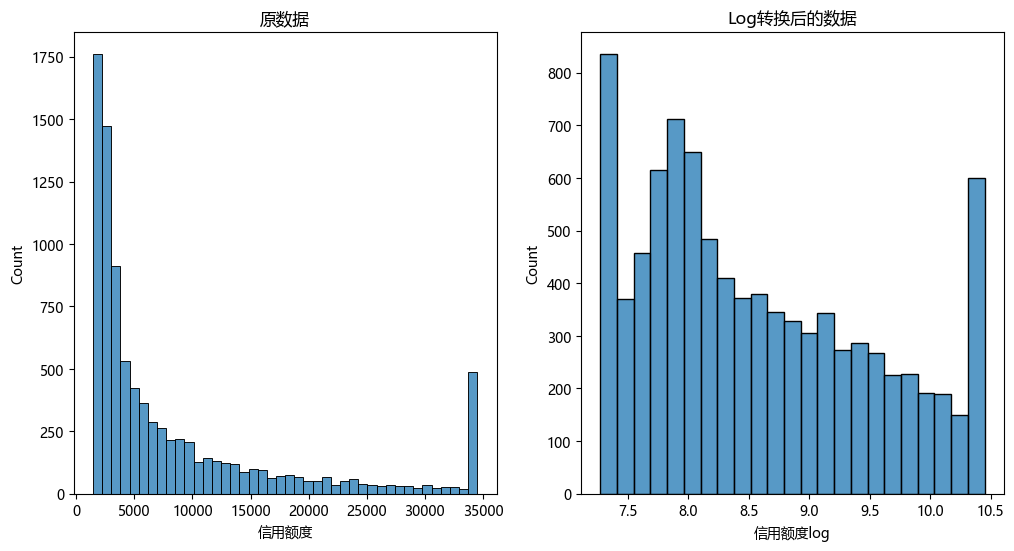

In [59]:
# 用直方图检查信用额度的分布
figure, axis = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(x='信用额度', data=data, ax=axis[0])
axis[0].set_title('原数据')
sns.histplot(x='信用额度log', data=data, ax=axis[1])
axis[1].set_title('Log转换后的数据')
plt.show()

**5. 特征工程**（预计15分钟，30分）

特征工程是指在原始数据的基础上，通过数据挖掘的方法来创造新的特征，从而提升模型的性能。它是机器学习中非常重要的一个环节，可以说好的特征工程往往能极大地提升模型的性能。

这包括创建新的特征（列），这些特征可能是现有特征的变换或组合。例如，从日期列中提取年份和月份，或根据现有的数值列创建新的比率特征。

1. 增加“平均单次刷卡开销”列（训练题） 或 增加“信用卡使用率”（ 比赛题，利用'信用卡总开销'和'信用额度'两个特征，创建一个新的特征叫做'信用卡使用率'，这个特征可以表示用户的信用卡使用情况，或者说是用户对银行的依赖程度，这可能对我们的流失预测模型是有帮助的。） 15分
2. 增加“收入类别”： 在特征工程中，我们经常通过转换或组合现有特征来创建新的特征。在这个例子中，我们通过对“收入”进行分桶（binning）来创建一个新的分类特征。训练比赛题 15分

In [60]:
# 生成新数列: 信用卡平均每次开销 = 信用卡总开销 / 信用卡使用次数
data['平均单次刷卡开销'] = data['信用卡总开销'] / data['信用卡使用次数']

In [61]:
#生成新数列：信用卡使用率 = 信息用卡总开销/信用额度
data['信用卡使用率'] = data['信用卡总开销'] / data['信用额度']

In [62]:
# 数据预处理之后数据展示
print("处理缺失值后的数据有{}行，{}列".format(data.shape[0], data.shape[1]))
data.head() # 查看数据预处理之后数据的前5行

处理缺失值后的数据有9015行，21列


,ID,年龄,性别,家庭成员,受教育程度,婚姻状态,收入,是否流失,信用卡类别,开卡的总月份,...,银行服务次数（一年）,信用额度,循环信贷,平均每月剩余额度,信用卡总开销,信用卡使用次数,平均利用率,信用额度log,平均单次刷卡开销,信用卡使用率
0,768805383,45.0,男,3,高中,已婚,6-8万,0,普通卡,39,...,3,12691.0,777,11914.0,1144,42,0.061,9.448648,27.238095,0.090143
1,818770008,49.0,女,5,研究生,单身,小于4万,0,普通卡,44,...,2,8256.0,864,7392.0,1291,33,0.105,9.018695,39.121212,0.156371
2,713982108,51.0,男,3,研究生,已婚,8-12万,0,普通卡,36,...,0,3418.0,0,3418.0,1887,20,0.000,8.136811,94.350000,0.552077
3,769911858,40.0,女,4,高中,未知,小于4万,0,普通卡,34,...,1,3313.0,2517,796.0,1171,20,0.760,8.105609,58.550000,0.353456
4,709106358,40.0,男,3,未受教育,已婚,6-8万,0,普通卡,21,...,0,4716.0,0,4716.0,816,28,0.000,8.458716,29.142857,0.173028


## 第三部分 数据探索和可视化 （预计35分钟，70分）

在这一阶段，我们将通过各种统计和图形化的方法来了解我们数据的主要特性、潜在关联、隐藏模式等。

在这个过程中，我们可能会使用到各种图形表示，例如条形图、直方图、箱形图、散点图等。这些都是为了帮助我们更好地理解数据，并找出可能的模式、趋势和异常值。

在Python中，我们通常使用Matplotlib和Seaborn库来进行数据可视化。Pandas库也提供了一些绘图功能，它们基于Matplotlib构建，但提供了更简单的接口。

**1. 用户流失分析** （预计10分钟，20分）

在这部分，我们将分析客户流失的情况。这是我们的核心关注点，因为我们希望找出哪些用户有可能会流失，以及他们的共同特点。

任务：

计算并报告客户流失率，即流失客户数量占总客户数量的比例。
绘制客户流失率的饼图，这将直观地展示出流失和未流失客户的比例。

比赛训练题，20分

流失率讲解：

假设我们的数据集中有1000名客户，其中有150名客户已经流失。那么我们可以这样计算客户流失率：
流失率 = 流失客户数 / 总客户数
流失率 = 150 / 1000
流失率 = 0.15

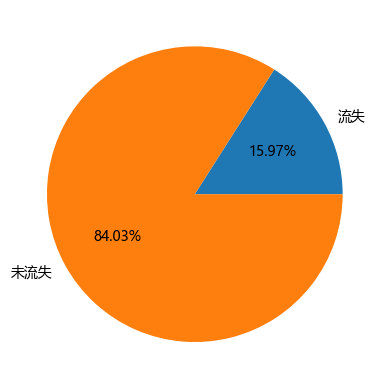

In [63]:
# 计算流失和未流失的用户数量
流失数 = data[data["是否流失"] == 1].shape[0]
未流失数 = data[data["是否流失"] == 0].shape[0]

# 流失和未流失用户数
客户数 = [流失数, 未流失数]

# 标签
标签 = ['流失', '未流失']

# 绘制饼图
plt.pie(客户数, labels = 标签, autopct='%1.2f%%')

# 显示图形
plt.show()

**2.用户特征分析** （预计10分钟，20分）

训练比赛题，可以设计2道题，各5分钟，10分。

这部分我们以年龄为例。假设我们的数据集中包含了从18岁到70岁的客户，我们想要查看不同年龄段客户的流失情况。首先，我们可以计算出每个年龄段的客户流失数，然后绘制一个直方图来展示结果：

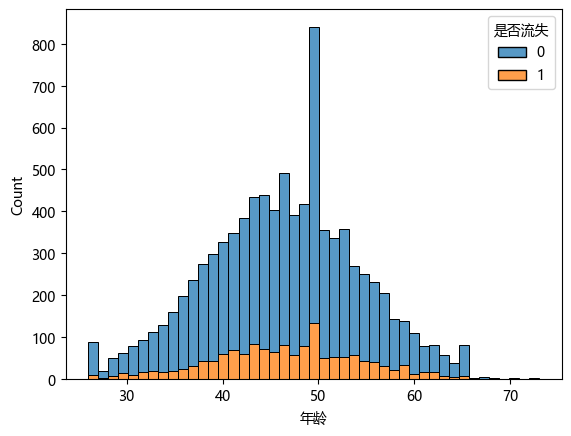

In [65]:
# 使用seaborn的histplot函数绘制年龄的分布直方图
sns.histplot(data=data, x="年龄", hue="是否流失", multiple="stack")

# 显示图形
plt.show()

这个直方图将显示出各年龄段的客户流失情况，这将帮助我们更好地理解年龄对客户流失的影响。

**3.特征间关系分析** （预计15分钟，30分）

在这部分，我们将探索数据集中各个特征之间的关系。我们可以计算并可视化特征间的相关性。

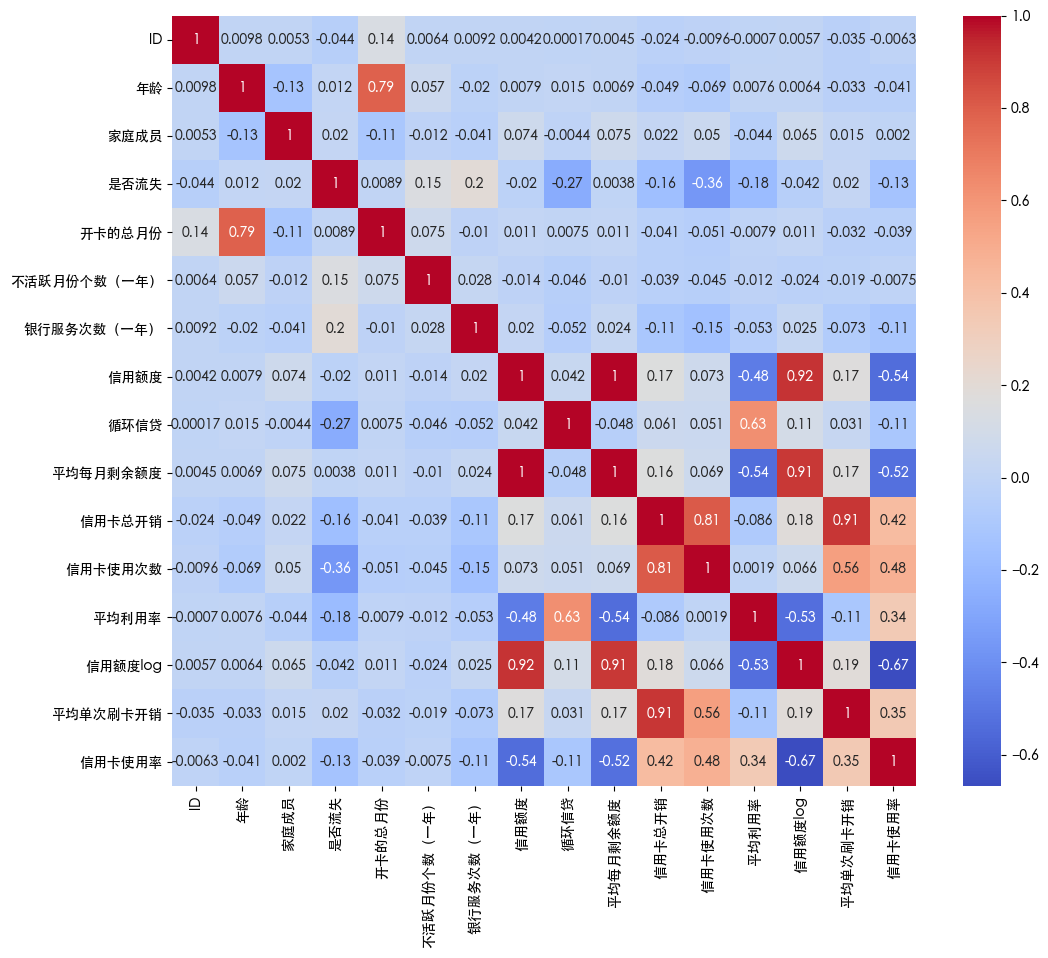

In [33]:
# 设置图形大小
plt.figure(figsize=(12, 10))


# 选择数值列
numerical_data = data.select_dtypes(include=[np.number])

# 计算相关性矩阵
corr_matrix = numerical_data.corr()

# 使用seaborn的heatmap函数绘制热力图
sns.heatmap(corr_matrix, annot=True,cmap="coolwarm")

# 显示图形
plt.show()

## 第四部分 数据挖掘与分析（预计55分钟，130分）

在这一部分，我们将深入研究数据，尝试寻找能够帮助我们理解客户流失的原因的有价值信息。

**1. 定义目标特征、类别特征、连续特征** （预计3分钟，5分）

In [34]:
# 目标特征
target = ['是否流失']
# 类别特征
category_features = [
    '性别', '受教育程度', '婚姻状态', '收入','信用卡类别'
]
# 连续特征
continous_features = [
    '年龄', '家庭成员', '开卡的总月份', '不活跃月份个数（一年）', '银行服务次数（一年）',
    '信用额度', '循环信贷', '平均每月剩余额度', '信用卡总开销', '信用卡使用次数', 
    '平均利用率', '信用额度log', '平均单次刷卡开销', '信用卡使用率' ]


这样的分类有利于我们更好地理解数据，并有针对性地进行数据分析。我们可以分别对这两类特征进行不同的分析。

对于类别特征，我们可以查看每个特征的类别数量，以及每个类别的样本数量分布。此外，我们还可以查看在每个类别下，客户流失的比例是多少。这可以帮助我们找到可能影响客户流失的关键类别。

对于连续特征，我们可以查看特征的基本统计信息，如均值、中位数、最小值、最大值等。此外，我们还可以绘制直方图，观察特征的分布情况。如果可能，我们还可以查看该特征在客户流失和未流失的样本之间的分布是否有显著差异。

接下来，我们可以开始对这些特征进行具体的分析。

**2. 观测类别变量中的用户流失数据** （预计2分钟，5分）

In [35]:
# 通过交叉表，统计“受教育程度”中的用户流失数据
cross_table = pd.crosstab(data["受教育程度"], data["是否流失"])
print(cross_table)

是否流失      0    1
受教育程度           
博士      683  167
未受教育   1097  205
未知     1145  229
本科生     767  138
研究生    2358  438
高中     1525  263


**3. 通过自定义函数，为全部类别变量绘制”变量与是否流失“的相关条形图** （预计10分钟，25分）

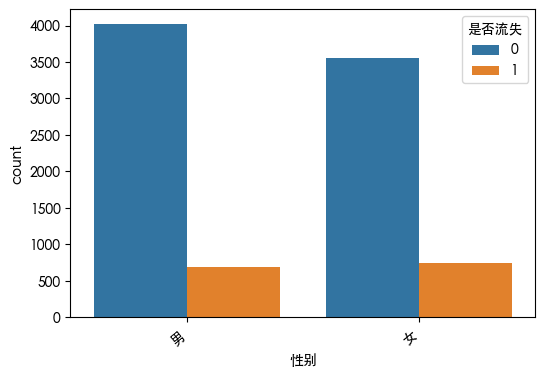

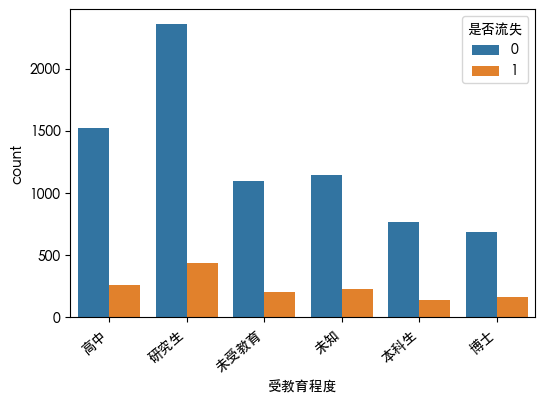

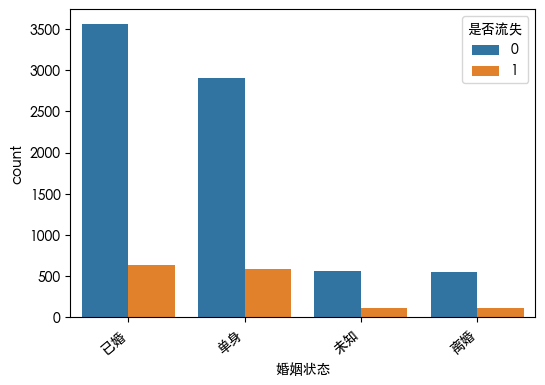

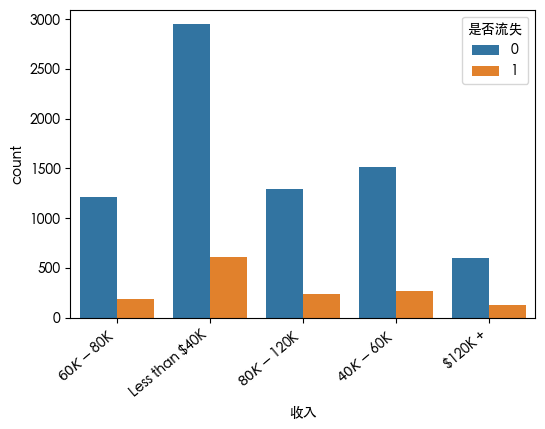

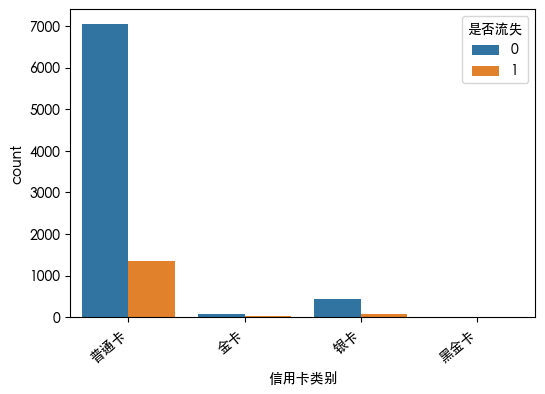

In [36]:
# 自定义函数，为类别变量绘制条形图
def plot_feature(feature):
    plt.figure(figsize=(6, 4)) # 创建新的图形
    sns.countplot(x=feature, hue='是否流失', data=data) # 使用seaborn的countplot绘制每个特征的计数条形图
    plt.xticks(rotation=40, ha="right") # 设置x轴标签的旋转角度和对齐方式，以便更好的展示
    plt.show() # 显示图像

# 为每个特征单独调用函数生成图
for feature in category_features:
    plot_feature(feature)

**4. 通过自定义函数，为全部连续变量绘制“变量与是否流失”的相关箱线图** （预计10分钟，25分）

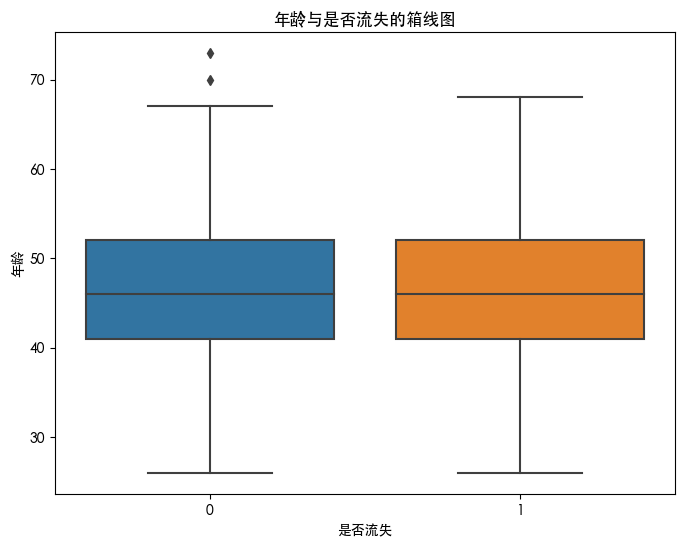

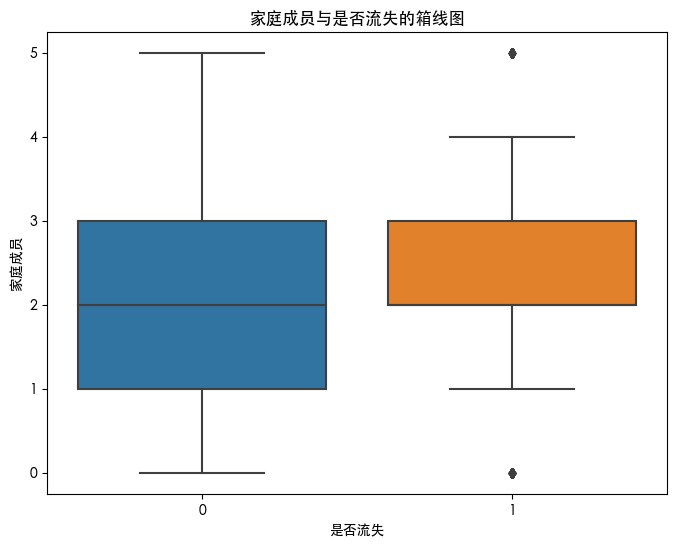

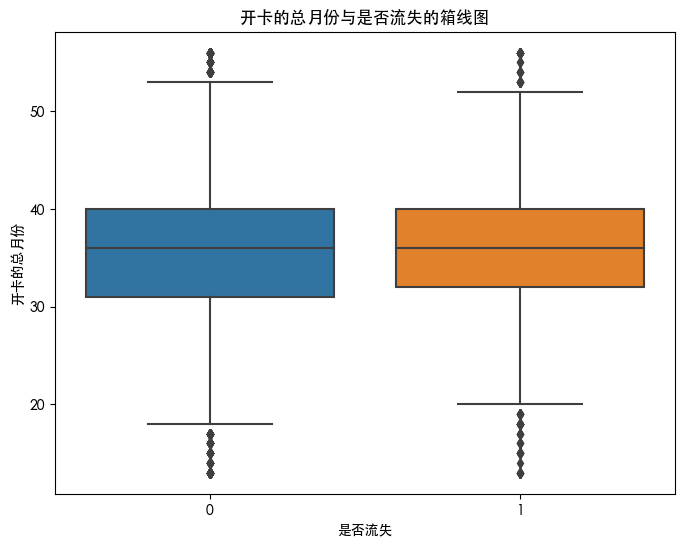

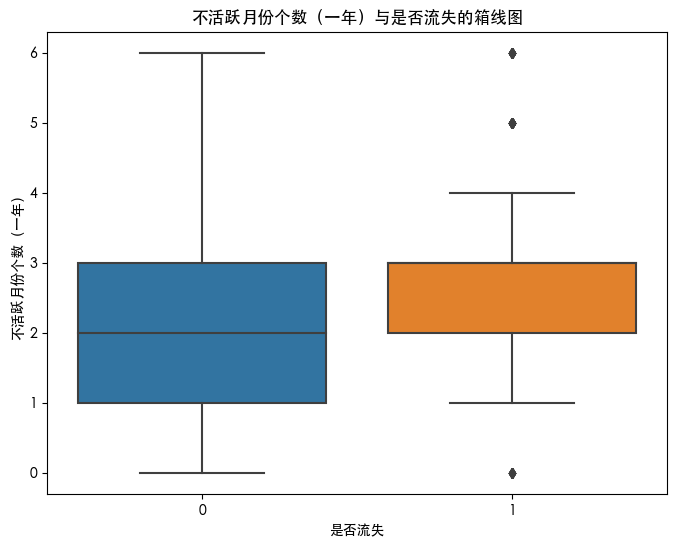

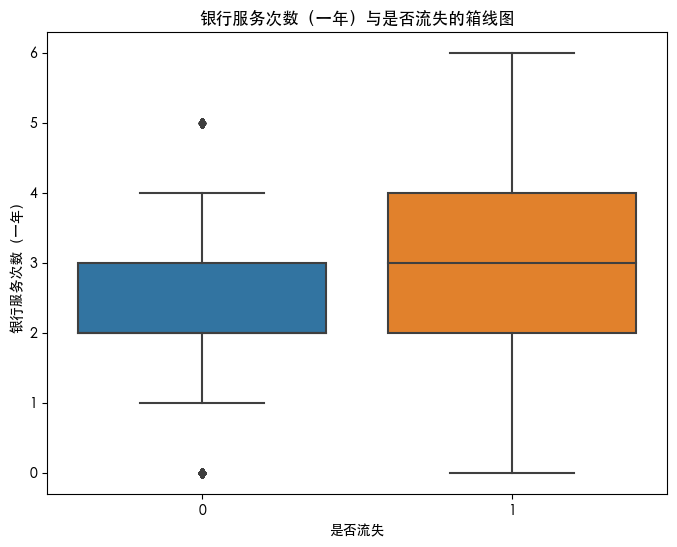

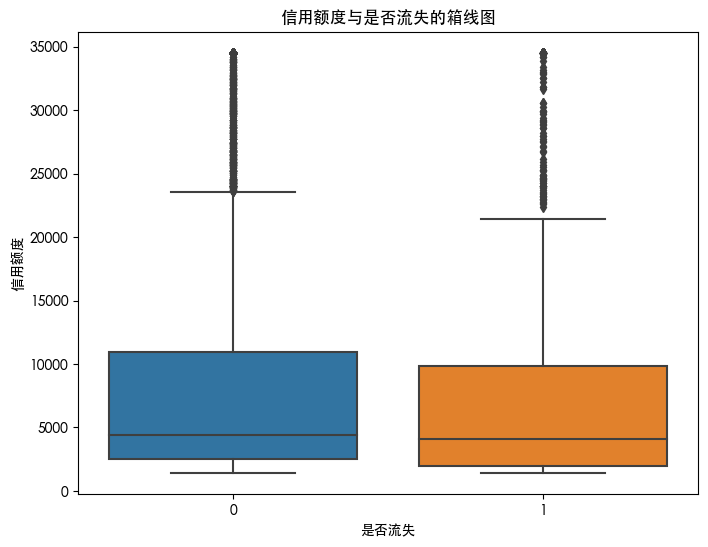

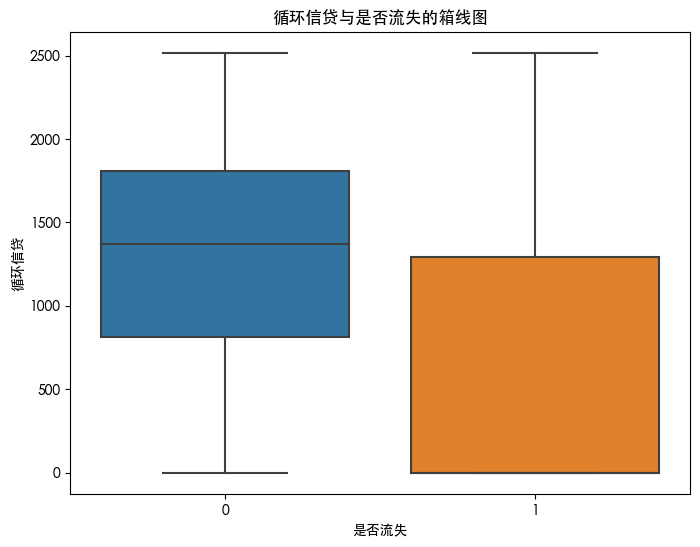

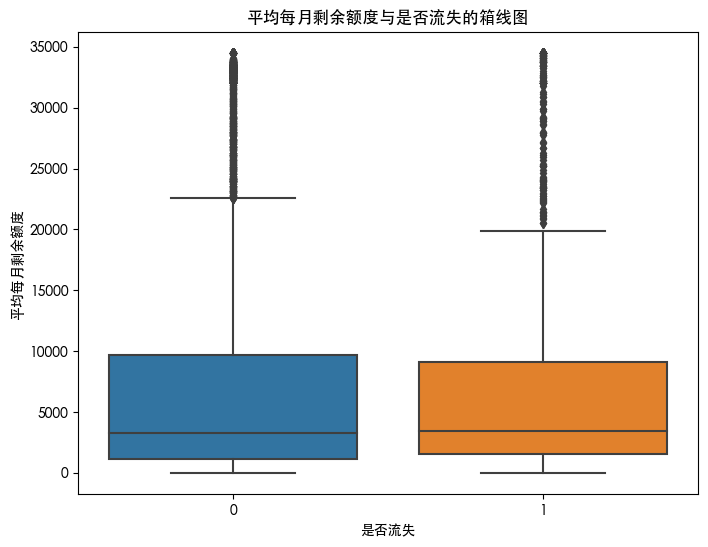

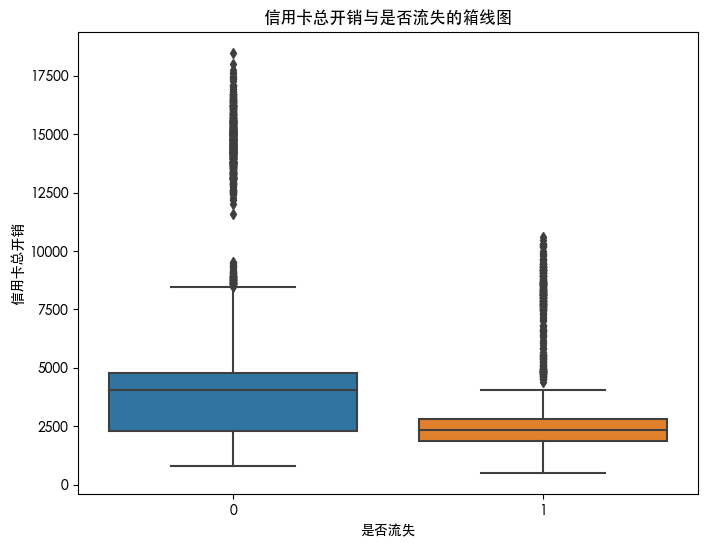

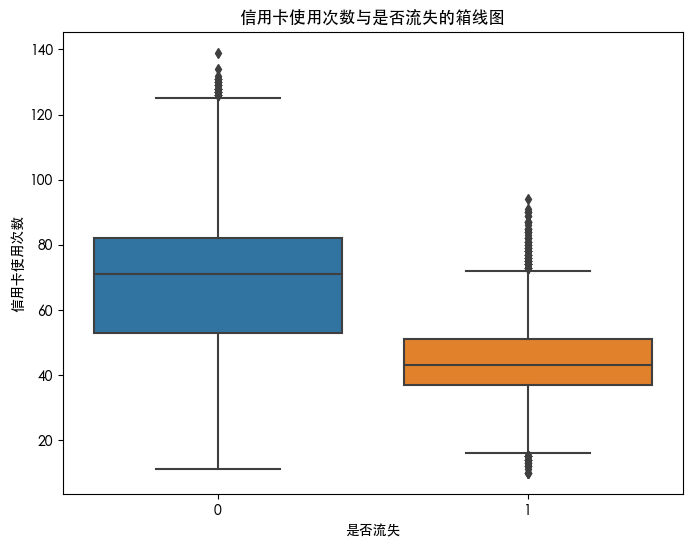

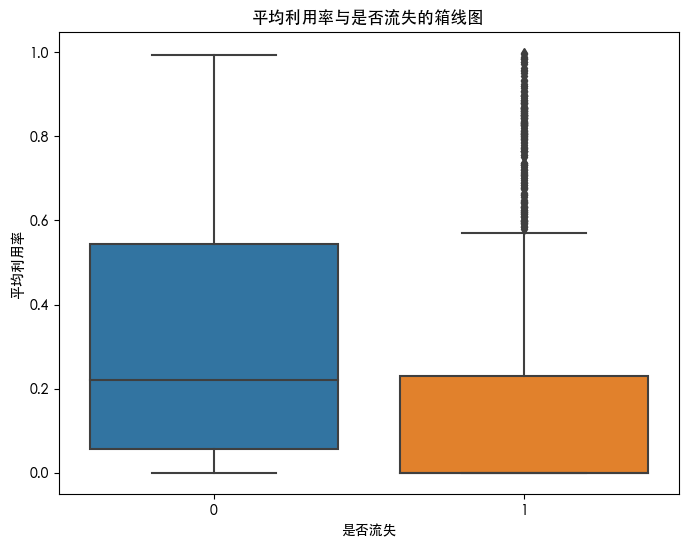

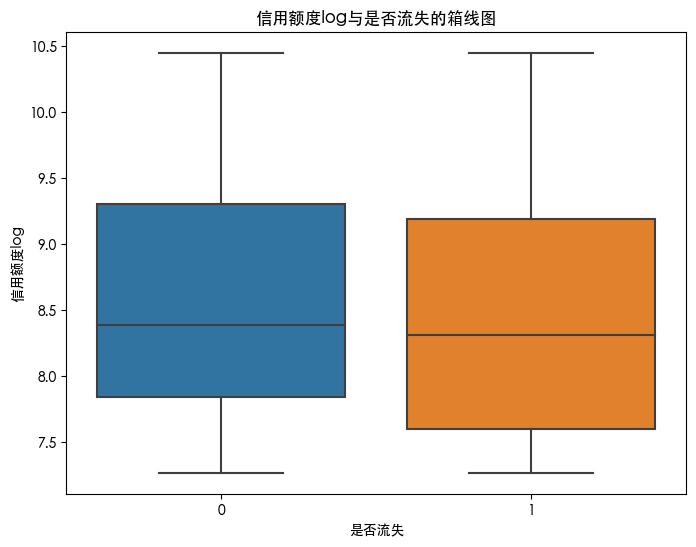

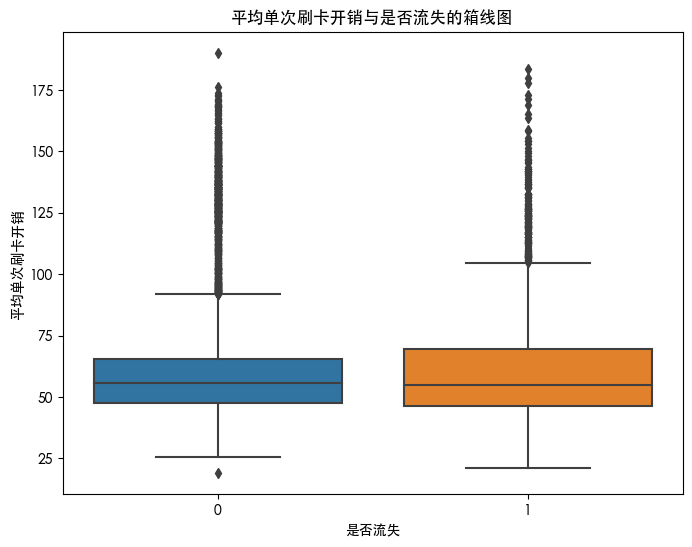

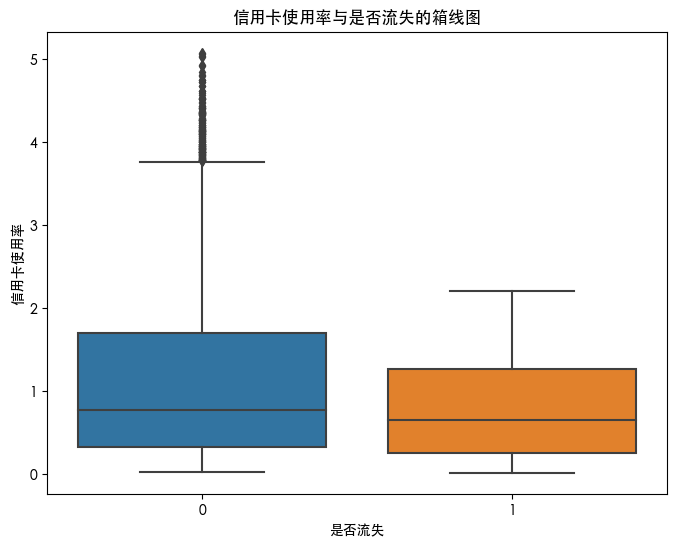

In [37]:
def draw_boxplot(data, features, target):
    for feature in features:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=target, y=feature, data=data)
        plt.title(f'{feature}与{target}的箱线图')
        plt.show()

# 使用函数为所有连续特征绘制箱线图
draw_boxplot(data, continous_features, '是否流失')

**5. 绘制三变量分析的散点图** （预计15分钟，30分）

我们在第4步的箱线图分析中发现，“信用卡总开销” 和 “信用卡使用次数”都疑似对“是否流失”有影响。接下来我们会用信用卡总开销、信用卡使用次数、是否流失做三变量分析。

绘制三变量分析的散点图，其中每个点代表一个用户，点的位置反映了该用户的'信用卡总开销'和'信用卡使用次数'，而点的颜色则表明了用户是否流失。通过这个图，你可以观察到两个变量之间的关系，以及它们如何与流失率相关。

<Axes: xlabel='信用卡总开销', ylabel='信用卡使用次数'>

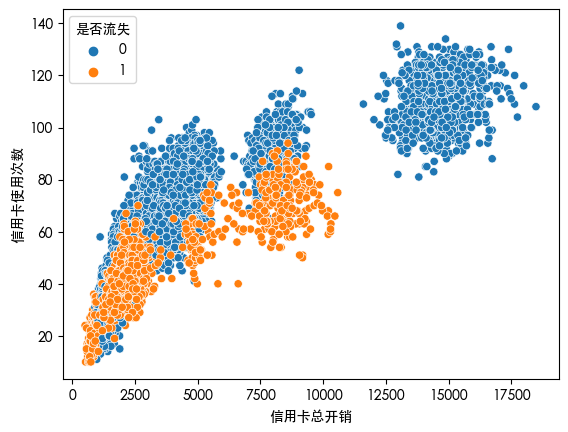

In [38]:
sns.scatterplot(x='信用卡总开销', y='信用卡使用次数', hue='是否流失', data=data)

In [39]:
# 针对上述图，我们选取以下的flag进行分析
flag = (data['信用卡总开销'] > 2000) & (data['信用卡使用次数'] < 50)
result = data['是否流失'][flag].value_counts()
print (result)
print(result / result.sum())

是否流失
1    602
0    266
Name: count, dtype: int64
是否流失
1    0.693548
0    0.306452
Name: count, dtype: float64


In [40]:
# 打印分析结论
print(
    "Flag里面的总数据量为{}，占总数据量的{:.2f}%。 其中流失的数据量为{}，占总流失数据的{:.2f}%。".format(
        sum(flag), 
        sum(flag) / len(data) * 100, 
        result[1], 
        result[1] / data['是否流失'].value_counts()[1] * 100
    )
)

Flag里面的总数据量为868，占总数据量的9.63%。 其中流失的数据量为602，占总流失数据的41.81%。


**6. 决策树分析** （预计15分钟，40分）

我们利用决策树模型进行预测，使用“信用卡总开销”和“信用卡使用次数”这两个特征来预测“是否流失”。

In [41]:
from sklearn import tree
target = ['是否流失']
features = ['信用卡总开销', '信用卡使用次数'] # 用 信用卡总开销 和 信用卡使用次数 作为特征 来预测是否流失
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 63) # 创建一个决策树分类器对象。max_depth = 3指定了树的最大深度为3，这可以防止过拟合。random_state = 63设置了随机数种子，以确保每次运行代码时，都能得到相同的结果。
clf.fit(data[features], data[target]) # 调用了clf.fit方法，训练决策树分类器。data[features]和data[target]分别为训练模型所用的特征和目标变量。

DecisionTreeClassifier(max_depth=3, random_state=63)

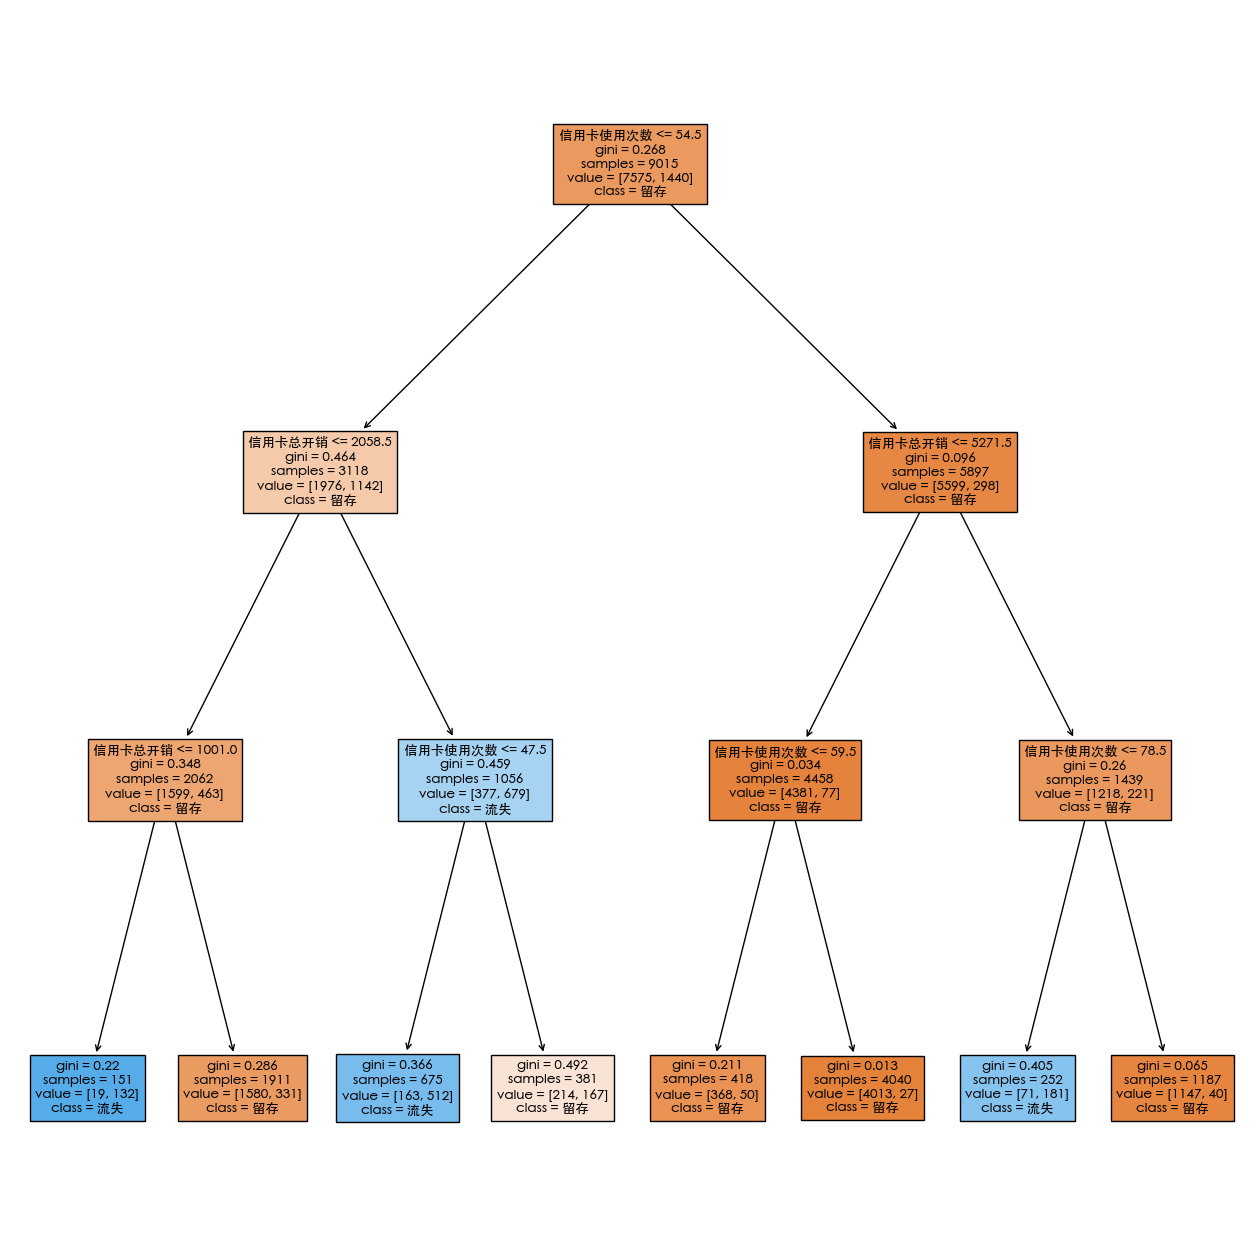

In [42]:
plt.figure(figsize=(16, 16))
tree_graph = tree.plot_tree(clf, filled=True, feature_names=features, class_names=["留存", "流失"])

**知识讲解**

tree.plot_tree(clf, filled=True, feature_names=features, class_names=["留存", "流失"])：这行代码使用plot_tree方法将决策树模型进行可视化。clf是我们训练好的决策树模型。参数filled=True意味着会对树的节点进行着色，以便区分不同的类别。参数feature_names=features指定了特征的名称，它们将被用于在树的节点中显示。参数class_names=["留存", "流失"]指定了类别的名称，这些名称会在叶节点处显示，来表明对应的类别。
这样，你就能看到一个图形化的决策树模型，每个节点都标注了对应的特征、划分阈值、样本数、类别分布以及最终的类别判断。通过这个图形，你可以清晰地看到决策树是如何根据不同特征的阈值进行划分，以及每次划分后样本的类别分布情况。

**分析报告**

根据决策树的结果，我们可以提出不同的干预方案交给业务部门。业务部门会根据我们提供的报告，再根据业务需求选择对应的策略。以上面决策树为例，我们可以从两个方向入手提出对应的方案：高准确性或高覆盖率。

方案	占总体人数比例	占流失人数比例	解释
1. 信用卡使用次数<=47.5 且 信用卡总开销<=2058.5，占总体人数比例6.82%，占流失人数比例35.55%，该条件下有75%的用户会流失，且该条件下的流失数量足够显著。
2. 信用卡使用次数<=54.5 且 信用卡总开销<=2058.5，占总体人数比例21.92%，占流失人数比例79.3%，该条件下有占全体近80%的流失数量，且该条件下的总人数也仅有总体的约20%。

   业务部门收到以上报告后，假设业务部门想先以低成本方式初步干预，那则会选择方案1，因为其准确性高达75%，较方案2相比涉及群体规模也仅为其1/3；若业务部门想尽可能多的挽留客户，那则会选择方案2，因为其覆盖了80%的流失客户，并且涉及规模也仅占整体的约1/5。

    现实情况中，业务部门也会根据其他指标来判断对流失客户干预的优先级，如信用卡等级，开卡时长，单笔开销等。